# Steps Involved : Data Exploration, Model Fitting, Best Model Selection, Inference

Created by Sujith Mangalathu and Jong-Su Jeon

# Data Exploration

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


data1 = pd.read_excel('Shear_Wall_Database.xlsx', sheet_name='Database')
data1.head()

Unnamed: 0                Author Specimen  FailureMode  M/Vlw      lw/tw  \
0           1  Lefas et al. (1990a)     SW11            1    1.1  10.714286   
1           2  Lefas et al. (1990a)     SW12            1    1.1  10.714286   
2           3  Lefas et al. (1990a)     SW13            1    1.1  10.714286   
3           4  Lefas et al. (1990a)     SW14            1    1.1  10.714286   
4           5  Lefas et al. (1990a)     SW15            1    1.1  10.714286   

   ρvwFy,vw/fc  ρhwFy,vw/fc  ρvcFy,vc/fc  ρhcFy,hc/fc    P/fcAg Section  Ab/Ag  
0     0.268879     0.136711     0.348231     0.149140  0.000000       R    0.0  
1     0.262358     0.133396     0.339785     0.145522  0.102168       R    0.0  
2     0.346364     0.176108     0.448584     0.192118  0.208187       R    0.0  
3     0.334023     0.169834     0.432601     0.185273  0.000000       R    0.0  
4     0.324766     0.165127     0.420612     0.180139  0.101727       R    0.0

In [2]:
data=data1.loc[:, 'FailureMode':'Ab/Ag']
data.head()

FailureMode  M/Vlw      lw/tw  ρvwFy,vw/fc  ρhwFy,vw/fc  ρvcFy,vc/fc  \
0            1    1.1  10.714286     0.268879     0.136711     0.348231   
1            1    1.1  10.714286     0.262358     0.133396     0.339785   
2            1    1.1  10.714286     0.346364     0.176108     0.448584   
3            1    1.1  10.714286     0.334023     0.169834     0.432601   
4            1    1.1  10.714286     0.324766     0.165127     0.420612   

   ρhcFy,hc/fc    P/fcAg Section  Ab/Ag  
0     0.149140  0.000000       R    0.0  
1     0.145522  0.102168       R    0.0  
2     0.192118  0.208187       R    0.0  
3     0.185273  0.000000       R    0.0  
4     0.180139  0.101727       R    0.0

In [3]:
print(data.shape)

(393, 10)


# Checking the data types, If string exists it should be converted into numerical values

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 10 columns):
FailureMode    393 non-null int64
M/Vlw          393 non-null float64
lw/tw          393 non-null float64
ρvwFy,vw/fc    393 non-null float64
ρhwFy,vw/fc    393 non-null float64
ρvcFy,vc/fc    393 non-null float64
ρhcFy,hc/fc    393 non-null float64
P/fcAg         393 non-null float64
Section        393 non-null object
Ab/Ag          393 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 30.8+ KB
None


Section contains string values

In [5]:
print(data['Section'].unique())


['R' 'B' 'F']


In [6]:
print(data.groupby('Section').size())

Section
B     95
F     60
R    238
dtype: int64


Rectnagular section is more than Barbel and flanged section

In [8]:
data_mod_lc = data.copy()
data_mod_lc['Section'] = data_mod_lc['Section'].astype('category')
#print(cat_bird_lc.dtypes)
data_mod_lc['Section'] = data_mod_lc['Section'].cat.codes
data_mod_lc.head(10)

FailureMode     M/Vlw      lw/tw  ρvwFy,vw/fc  ρhwFy,vw/fc  ρvcFy,vc/fc  \
0            1  1.100000  10.714286     0.268879     0.136711     0.348231   
1            1  1.100000  10.714286     0.262358     0.133396     0.339785   
2            1  1.100000  10.714286     0.346364     0.176108     0.448584   
3            1  1.100000  10.714286     0.334023     0.169834     0.432601   
4            1  1.100000  10.714286     0.324766     0.165127     0.420612   
5            1  1.100000  10.714286     0.271999     0.138298     0.352273   
6            1  1.100000  10.714286     0.291146     0.049793     0.401398   
7            1  2.115385  10.000000     0.342420     0.121495     0.452979   
8            1  2.115385  10.000000     0.290267     0.102767     0.383152   
9            1  2.115385  10.000000     0.307270     0.108787     0.405596   

   ρhcFy,hc/fc    P/fcAg  Section  Ab/Ag  
0     0.149140  0.000000        2    0.0  
1     0.145522  0.102168        2    0.0  
2     0.192118  0.208187        2    0.0  
3     0.185273  0.000000        2    0.0  
4     0.180139  0.101727        2    0.0  
5     0.150870  0.211845        2    0.0  
6     0.161491  0.000000        2    0.0  
7     0.136682  0.000000        2    0.0  
8     0.115613  0.106415        2    0.0  
9     0.122385  0.212300        2    0.0

In [10]:
data['Section'] = data_mod_lc['Section']
data.head()

FailureMode  M/Vlw      lw/tw  ρvwFy,vw/fc  ρhwFy,vw/fc  ρvcFy,vc/fc  \
0            1    1.1  10.714286     0.268879     0.136711     0.348231   
1            1    1.1  10.714286     0.262358     0.133396     0.339785   
2            1    1.1  10.714286     0.346364     0.176108     0.448584   
3            1    1.1  10.714286     0.334023     0.169834     0.432601   
4            1    1.1  10.714286     0.324766     0.165127     0.420612   

   ρhcFy,hc/fc    P/fcAg  Section  Ab/Ag  
0     0.149140  0.000000        2    0.0  
1     0.145522  0.102168        2    0.0  
2     0.192118  0.208187        2    0.0  
3     0.185273  0.000000        2    0.0  
4     0.180139  0.101727        2    0.0

In [11]:
c = data_mod_lc.Section.astype('category')
d = dict(enumerate(c.cat.categories))
print (d)

{0: 0, 1: 1, 2: 2}


In [12]:
#checking missing values by column
data.isnull().sum()

FailureMode    0
M/Vlw          0
lw/tw          0
ρvwFy,vw/fc    0
ρhwFy,vw/fc    0
ρvcFy,vc/fc    0
ρhcFy,hc/fc    0
P/fcAg         0
Section        0
Ab/Ag          0
dtype: int64

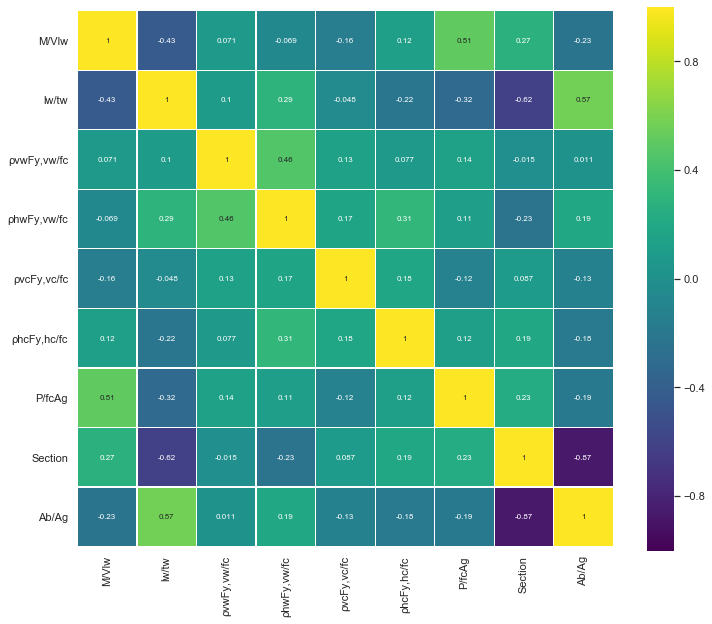

In [14]:
corr = data.drop('FailureMode', axis=1).corr() # examining correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.0) | (corr <= -0.0)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

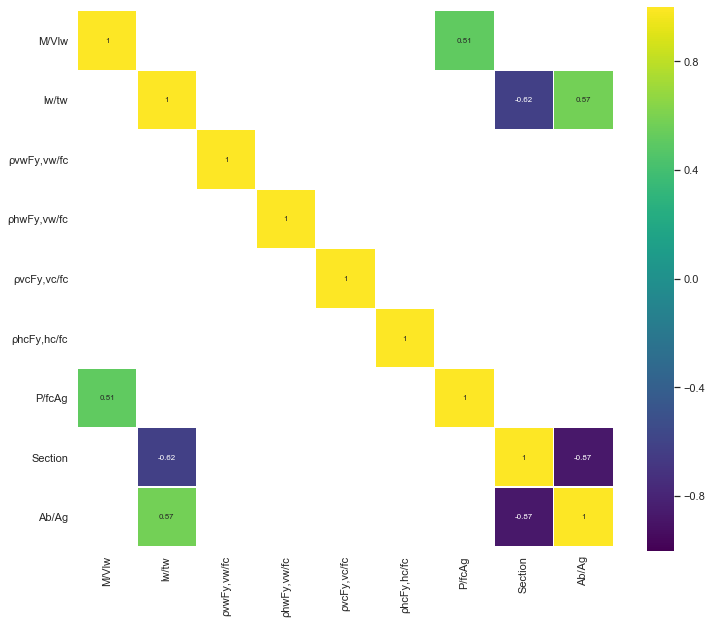

In [15]:
# Plotting correlation above or below 0.5
corr = data.drop('FailureMode', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [16]:
features = list(data.columns.values)
print(features)

['FailureMode', 'M/Vlw', 'lw/tw', 'ρvwFy,vw/fc', 'ρhwFy,vw/fc', 'ρvcFy,vc/fc', 'ρhcFy,hc/fc', 'P/fcAg', 'Section', 'Ab/Ag']


C:\Users\sujit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sujit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


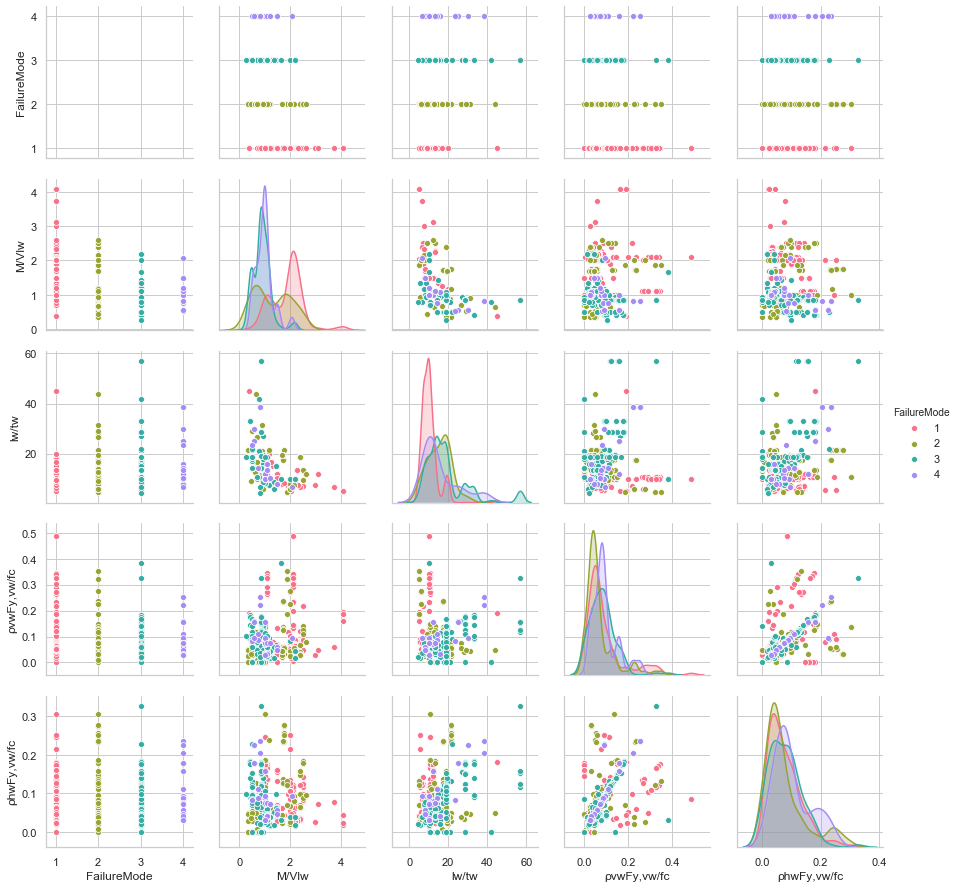

In [18]:
import seaborn as sns

quantitative_features_list1 = ['FailureMode', 'M/Vlw', 'lw/tw', 'ρvwFy,vw/fc', 'ρhwFy,vw/fc']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data, hue="FailureMode", palette="husl")

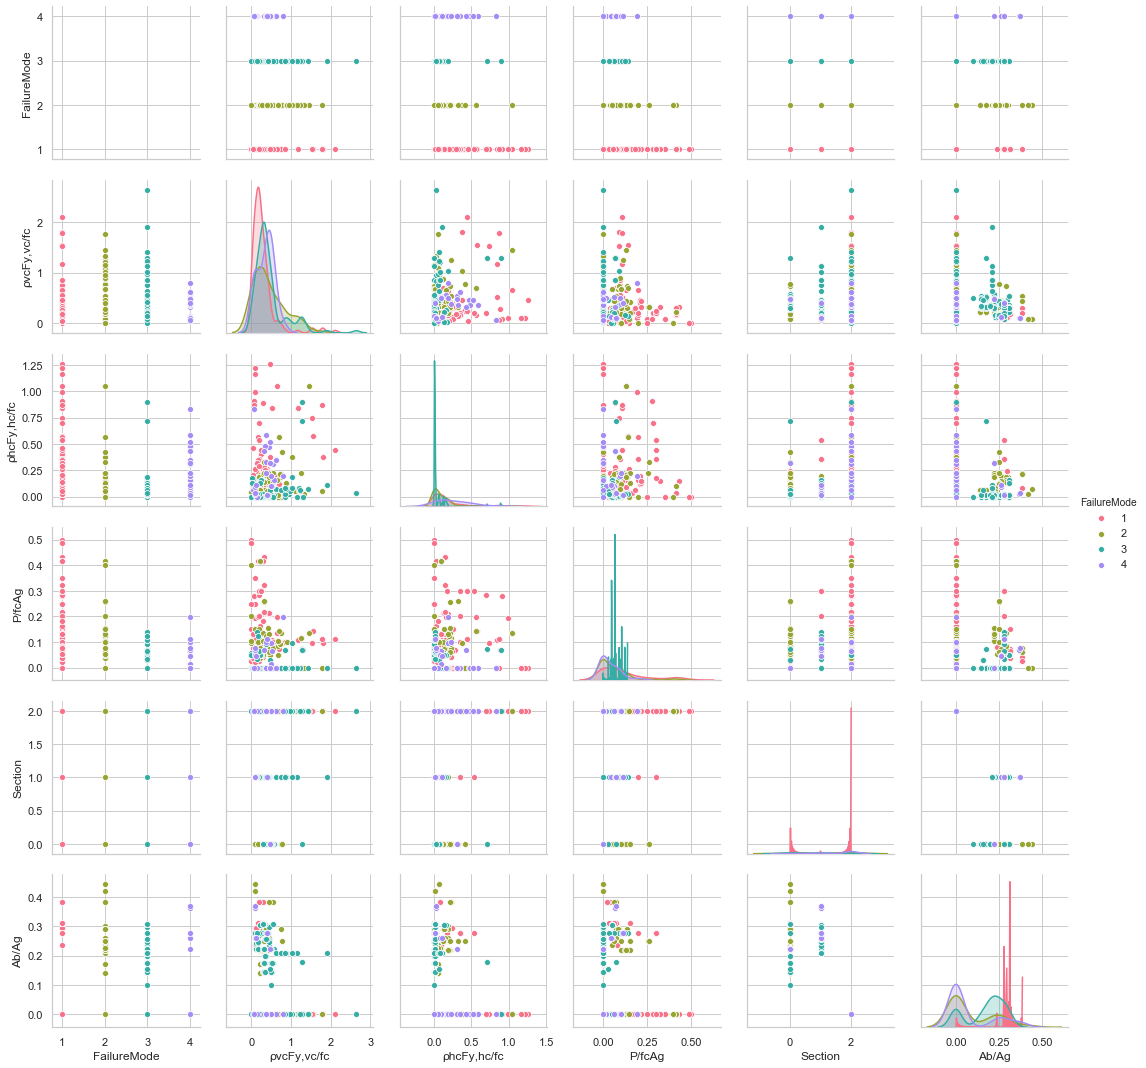

In [20]:
import seaborn as sns

quantitative_features_list1 = ['FailureMode', 'ρvcFy,vc/fc', 'ρhcFy,hc/fc', 'P/fcAg', 'Section', 'Ab/Ag']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data, hue="FailureMode", palette="husl")

Text(0, 0.5, 'Failure Mode')

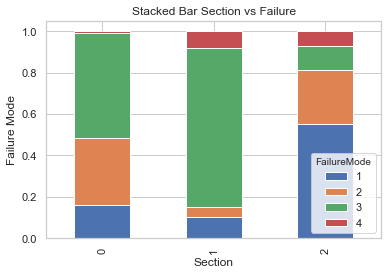

In [22]:
table=pd.crosstab(data.Section,data.FailureMode)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Section vs Failure')
plt.xlabel('Section')
plt.ylabel('Failure Mode')

Section type seems to have an influence on the failure mode. However further analysis is needed to check whether its statistically significant

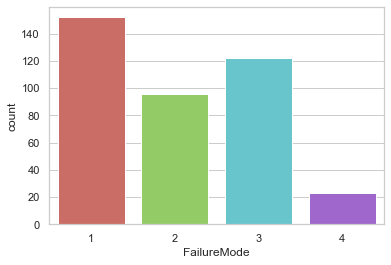

In [23]:
#Lets check wheter data is imbalanced

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='FailureMode',data=data, palette='hls')
plt.show()

Data set is imbalanced with respect to the Failure Mode

In [24]:
#One Hot Encoding for the categorical values
data = pd.get_dummies(data = data , columns=['Section'] )
data.head()

FailureMode  M/Vlw      lw/tw  ρvwFy,vw/fc  ρhwFy,vw/fc  ρvcFy,vc/fc  \
0            1    1.1  10.714286     0.268879     0.136711     0.348231   
1            1    1.1  10.714286     0.262358     0.133396     0.339785   
2            1    1.1  10.714286     0.346364     0.176108     0.448584   
3            1    1.1  10.714286     0.334023     0.169834     0.432601   
4            1    1.1  10.714286     0.324766     0.165127     0.420612   

   ρhcFy,hc/fc    P/fcAg  Ab/Ag  Section_0  Section_1  Section_2  
0     0.149140  0.000000    0.0          0          0          1  
1     0.145522  0.102168    0.0          0          0          1  
2     0.192118  0.208187    0.0          0          0          1  
3     0.185273  0.000000    0.0          0          0          1  
4     0.180139  0.101727    0.0          0          0          1

In [26]:
X = data.loc[:, data.columns != 'FailureMode']
y=data['FailureMode']
X.head()

M/Vlw      lw/tw  ρvwFy,vw/fc  ρhwFy,vw/fc  ρvcFy,vc/fc  ρhcFy,hc/fc  \
0    1.1  10.714286     0.268879     0.136711     0.348231     0.149140   
1    1.1  10.714286     0.262358     0.133396     0.339785     0.145522   
2    1.1  10.714286     0.346364     0.176108     0.448584     0.192118   
3    1.1  10.714286     0.334023     0.169834     0.432601     0.185273   
4    1.1  10.714286     0.324766     0.165127     0.420612     0.180139   

     P/fcAg  Ab/Ag  Section_0  Section_1  Section_2  
0  0.000000    0.0          0          0          1  
1  0.102168    0.0          0          0          1  
2  0.208187    0.0          0          0          1  
3  0.000000    0.0          0          0          1  
4  0.101727    0.0          0          0          1

##### Spliiting the data into training and test sets

In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: FailureMode, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Naive Bayes techique

In [29]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.69
Accuracy of GNB classifier on test set: 0.76


Confusion Matrix of training set

In [30]:
y_pred_train = gnb.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[82 17  5  2]
 [15 39 12  0]
 [ 2 20 61  1]
 [ 4  3  5  7]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.80      0.77      0.78       106
           2       0.49      0.59      0.54        66
           3       0.73      0.73      0.73        84
           4       0.70      0.37      0.48        19

    accuracy                           0.69       275
   macro avg       0.68      0.61      0.63       275
weighted avg       0.70      0.69      0.69       275



Confusion Matrix of test set

In [32]:
y_pred = gnb.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[38  4  3  1]
 [ 6 21  3  0]
 [ 2  5 30  1]
 [ 1  1  1  1]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.83      0.82        46
           2       0.68      0.70      0.69        30
           3       0.81      0.79      0.80        38
           4       0.33      0.25      0.29         4

    accuracy                           0.76       118
   macro avg       0.66      0.64      0.65       118
weighted avg       0.76      0.76      0.76       118



## K-Nearest neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.85


Confusion Matrix of training set

In [35]:
y_pred_train = knn.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[96  5  3  2]
 [15 46  5  0]
 [ 4  8 72  0]
 [ 4  3  6  6]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.81      0.91      0.85       106
           2       0.74      0.70      0.72        66
           3       0.84      0.86      0.85        84
           4       0.75      0.32      0.44        19

    accuracy                           0.80       275
   macro avg       0.78      0.69      0.72       275
weighted avg       0.80      0.80      0.79       275



Confusion Matrix of test set

In [37]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[43  1  0  2]
 [ 7 20  3  0]
 [ 1  3 34  0]
 [ 0  0  1  3]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.93      0.89        46
           2       0.83      0.67      0.74        30
           3       0.89      0.89      0.89        38
           4       0.60      0.75      0.67         4

    accuracy                           0.85       118
   macro avg       0.79      0.81      0.80       118
weighted avg       0.85      0.85      0.84       118



## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.79


Confusion Matrix of training set

In [40]:
y_pred_train = clf.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[106   0   0   0]
 [  0  66   0   0]
 [  0   0  84   0]
 [  0   0   0  19]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        19

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Confusion Matrix of test set

In [42]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[37  6  3  0]
 [ 4 22  1  3]
 [ 4  1 31  2]
 [ 0  1  0  3]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.80      0.81        46
           2       0.73      0.73      0.73        30
           3       0.89      0.82      0.85        38
           4       0.38      0.75      0.50         4

    accuracy                           0.79       118
   macro avg       0.70      0.78      0.72       118
weighted avg       0.80      0.79      0.79       118



## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RF = RandomForestClassifier(n_estimators=200,  random_state=0)
RF.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RF.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(RF.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.86


Confusion Matrix of training set

In [45]:
y_pred_train = RF.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[106   0   0   0]
 [  0  66   0   0]
 [  0   0  84   0]
 [  0   0   0  19]]


Confusion Matrix of test set


In [46]:
y_pred = RF.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[43  2  0  1]
 [ 5 21  3  1]
 [ 2  2 34  0]
 [ 0  0  0  4]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.93      0.90        46
           2       0.84      0.70      0.76        30
           3       0.92      0.89      0.91        38
           4       0.67      1.00      0.80         4

    accuracy                           0.86       118
   macro avg       0.82      0.88      0.84       118
weighted avg       0.87      0.86      0.86       118



In [48]:
RF.feature_importances_

array([0.19314531, 0.13153915, 0.09183167, 0.09759066, 0.1397623 ,
       0.13749226, 0.06990941, 0.07369148, 0.00996661, 0.01949359,
       0.03557756])

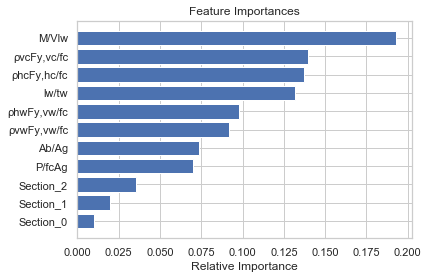

In [49]:
features = list(X.columns.values)

importances = RF.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hypertune Random Forest Parameters to improve the accuracy

In [50]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#print(random_grid)

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
rfc_random.fit(X_train, y_train)

# print results
print(rfc_random.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.0min finished
C:\Users\sujit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False}


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RF1 = RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto', max_depth=50, bootstrap= 'False')
RF1.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RF1.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(RF1.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.86


Optimization doeent improve the performance

Confusion Matrix of training set

In [55]:
y_pred_train = RF1.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[106   0   0   0]
 [  0  66   0   0]
 [  0   0  84   0]
 [  0   0   0  19]]


Confusion Matrix of test set

In [56]:
y_pred = RF1.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[42  3  0  1]
 [ 5 21  3  1]
 [ 2  1 35  0]
 [ 0  0  0  4]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.91      0.88        46
           2       0.84      0.70      0.76        30
           3       0.92      0.92      0.92        38
           4       0.67      1.00      0.80         4

    accuracy                           0.86       118
   macro avg       0.82      0.88      0.84       118
weighted avg       0.87      0.86      0.86       118



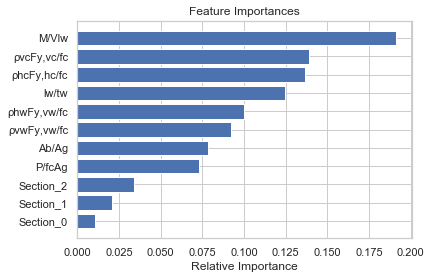

In [58]:
RF1.feature_importances_
features = list(X.columns.values)

importances = RF1.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## ADABOOST

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

ADB = AdaBoostClassifier(n_estimators=100, random_state=0)
ADB.fit(X_train, y_train)
print('Accuracy of ADB classifier on training set: {:.2f}'
     .format(ADB.score(X_train, y_train)))
print('Accuracy of ADB classifier on test set: {:.2f}'
     .format(ADB.score(X_test, y_test)))

Accuracy of ADB classifier on training set: 0.76
Accuracy of ADB classifier on test set: 0.67


Confusion Matrix of training set

In [60]:
y_pred_train = ADB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[85 17  4  0]
 [13 46  6  1]
 [ 7 13 62  2]
 [ 0  2  2 15]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.81      0.80      0.81       106
           2       0.59      0.70      0.64        66
           3       0.84      0.74      0.78        84
           4       0.83      0.79      0.81        19

    accuracy                           0.76       275
   macro avg       0.77      0.76      0.76       275
weighted avg       0.77      0.76      0.76       275



Confusion Matrix of test set

In [62]:
y_pred = ADB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[36  6  1  3]
 [ 9 15  5  1]
 [ 4  8 26  0]
 [ 0  2  0  2]]


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.78      0.76        46
           2       0.48      0.50      0.49        30
           3       0.81      0.68      0.74        38
           4       0.33      0.50      0.40         4

    accuracy                           0.67       118
   macro avg       0.59      0.62      0.60       118
weighted avg       0.68      0.67      0.67       118



## XGBOOST

In [65]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

XGB = XGBClassifier()
XGB.fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
     .format(XGB.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
     .format(XGB.score(X_test, y_test)))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.83


Confusion Matrix of training set

In [66]:
y_pred_train = XGB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[106   0   0   0]
 [  0  66   0   0]
 [  0   0  84   0]
 [  0   0   0  19]]


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        19

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Confusion Matrix of test set

In [68]:
y_pred = XGB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[41  4  0  1]
 [ 7 19  3  1]
 [ 2  2 34  0]
 [ 0  0  0  4]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.89      0.85        46
           2       0.76      0.63      0.69        30
           3       0.92      0.89      0.91        38
           4       0.67      1.00      0.80         4

    accuracy                           0.83       118
   macro avg       0.79      0.85      0.81       118
weighted avg       0.83      0.83      0.83       118



## Light GBM

In [70]:
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification

LGB = LGBMClassifier()
LGB.fit(X_train, y_train)
print('Accuracy of LGB classifier on training set: {:.2f}'
     .format(LGB.score(X_train, y_train)))
print('Accuracy of LGB classifier on test set: {:.2f}'
     .format(LGB.score(X_test, y_test)))

Accuracy of LGB classifier on training set: 1.00
Accuracy of LGB classifier on test set: 0.80


Confusion Matrix of training set

In [71]:
y_pred_train = LGB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[106   0   0   0]
 [  0  66   0   0]
 [  0   0  84   0]
 [  0   0   0  19]]


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        19

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Confusion Matrix of test set


In [73]:
y_pred = LGB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[39  7  0  0]
 [ 7 19  3  1]
 [ 3  3 32  0]
 [ 0  0  0  4]]


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.85      0.82        46
           2       0.66      0.63      0.64        30
           3       0.91      0.84      0.88        38
           4       0.80      1.00      0.89         4

    accuracy                           0.80       118
   macro avg       0.79      0.83      0.81       118
weighted avg       0.80      0.80      0.80       118



# Cat BOOST

In [75]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification

CGB = CatBoostClassifier()
CGB.fit(X_train, y_train)
print('Accuracy of CGB classifier on training set: {:.2f}'
     .format(CGB.score(X_train, y_train)))
print('Accuracy of CGB classifier on test set: {:.2f}'
     .format(CGB.score(X_test, y_test)))

0:	learn: 1.3665560	total: 148ms	remaining: 2m 27s
1:	learn: 1.3426094	total: 234ms	remaining: 1m 56s
2:	learn: 1.3250671	total: 316ms	remaining: 1m 44s
3:	learn: 1.3026843	total: 395ms	remaining: 1m 38s
4:	learn: 1.2793238	total: 495ms	remaining: 1m 38s
5:	learn: 1.2611143	total: 596ms	remaining: 1m 38s
6:	learn: 1.2440581	total: 677ms	remaining: 1m 36s
7:	learn: 1.2263877	total: 768ms	remaining: 1m 35s
8:	learn: 1.2075932	total: 862ms	remaining: 1m 34s
9:	learn: 1.1887973	total: 976ms	remaining: 1m 36s
10:	learn: 1.1737944	total: 1.06s	remaining: 1m 35s
11:	learn: 1.1567462	total: 1.13s	remaining: 1m 32s
12:	learn: 1.1415825	total: 1.22s	remaining: 1m 32s
13:	learn: 1.1281637	total: 1.32s	remaining: 1m 33s
14:	learn: 1.1131922	total: 1.42s	remaining: 1m 33s
15:	learn: 1.0999947	total: 1.51s	remaining: 1m 32s
16:	learn: 1.0853985	total: 1.6s	remaining: 1m 32s
17:	learn: 1.0725912	total: 1.69s	remaining: 1m 32s
18:	learn: 1.0603859	total: 1.78s	remaining: 1m 32s
19:	learn: 1.0485313	to

159:	learn: 0.4668673	total: 13.6s	remaining: 1m 11s
160:	learn: 0.4643303	total: 13.7s	remaining: 1m 11s
161:	learn: 0.4627145	total: 13.7s	remaining: 1m 11s
162:	learn: 0.4614726	total: 13.8s	remaining: 1m 11s
163:	learn: 0.4600907	total: 13.9s	remaining: 1m 11s
164:	learn: 0.4579551	total: 14s	remaining: 1m 11s
165:	learn: 0.4559516	total: 14.1s	remaining: 1m 10s
166:	learn: 0.4540119	total: 14.2s	remaining: 1m 10s
167:	learn: 0.4523024	total: 14.3s	remaining: 1m 10s
168:	learn: 0.4500752	total: 14.4s	remaining: 1m 10s
169:	learn: 0.4482068	total: 14.5s	remaining: 1m 10s
170:	learn: 0.4474807	total: 14.5s	remaining: 1m 10s
171:	learn: 0.4460594	total: 14.6s	remaining: 1m 10s
172:	learn: 0.4446447	total: 14.7s	remaining: 1m 10s
173:	learn: 0.4422568	total: 14.8s	remaining: 1m 10s
174:	learn: 0.4404793	total: 14.9s	remaining: 1m 10s
175:	learn: 0.4390612	total: 15s	remaining: 1m 10s
176:	learn: 0.4369715	total: 15.1s	remaining: 1m 10s
177:	learn: 0.4356954	total: 15.1s	remaining: 1m 9

319:	learn: 0.2746216	total: 28.2s	remaining: 59.9s
320:	learn: 0.2741361	total: 28.2s	remaining: 59.7s
321:	learn: 0.2731803	total: 28.3s	remaining: 59.5s
322:	learn: 0.2723186	total: 28.3s	remaining: 59.4s
323:	learn: 0.2715387	total: 28.4s	remaining: 59.2s
324:	learn: 0.2706288	total: 28.4s	remaining: 59s
325:	learn: 0.2703078	total: 28.5s	remaining: 59s
326:	learn: 0.2698823	total: 28.6s	remaining: 58.9s
327:	learn: 0.2690255	total: 28.7s	remaining: 58.7s
328:	learn: 0.2682972	total: 28.7s	remaining: 58.5s
329:	learn: 0.2675084	total: 28.7s	remaining: 58.4s
330:	learn: 0.2667865	total: 28.8s	remaining: 58.2s
331:	learn: 0.2656480	total: 28.9s	remaining: 58.1s
332:	learn: 0.2649850	total: 28.9s	remaining: 57.9s
333:	learn: 0.2644942	total: 29s	remaining: 57.7s
334:	learn: 0.2637162	total: 29s	remaining: 57.6s
335:	learn: 0.2631609	total: 29.1s	remaining: 57.6s
336:	learn: 0.2621806	total: 29.2s	remaining: 57.5s
337:	learn: 0.2613208	total: 29.3s	remaining: 57.4s
338:	learn: 0.260743

479:	learn: 0.1888772	total: 42.5s	remaining: 46s
480:	learn: 0.1886124	total: 42.6s	remaining: 46s
481:	learn: 0.1881266	total: 42.7s	remaining: 45.9s
482:	learn: 0.1877798	total: 42.8s	remaining: 45.8s
483:	learn: 0.1874838	total: 42.9s	remaining: 45.7s
484:	learn: 0.1870637	total: 43s	remaining: 45.6s
485:	learn: 0.1866432	total: 43.1s	remaining: 45.6s
486:	learn: 0.1862453	total: 43.1s	remaining: 45.5s
487:	learn: 0.1859177	total: 43.2s	remaining: 45.3s
488:	learn: 0.1854658	total: 43.3s	remaining: 45.2s
489:	learn: 0.1851249	total: 43.3s	remaining: 45.1s
490:	learn: 0.1848924	total: 43.4s	remaining: 44.9s
491:	learn: 0.1845854	total: 43.4s	remaining: 44.8s
492:	learn: 0.1843497	total: 43.4s	remaining: 44.7s
493:	learn: 0.1839248	total: 43.5s	remaining: 44.6s
494:	learn: 0.1835758	total: 43.5s	remaining: 44.4s
495:	learn: 0.1831606	total: 43.6s	remaining: 44.3s
496:	learn: 0.1828425	total: 43.6s	remaining: 44.2s
497:	learn: 0.1823421	total: 43.7s	remaining: 44.1s
498:	learn: 0.1820

639:	learn: 0.1412729	total: 56.5s	remaining: 31.8s
640:	learn: 0.1411146	total: 56.6s	remaining: 31.7s
641:	learn: 0.1409020	total: 56.7s	remaining: 31.6s
642:	learn: 0.1406710	total: 56.8s	remaining: 31.5s
643:	learn: 0.1404656	total: 56.9s	remaining: 31.4s
644:	learn: 0.1402378	total: 57s	remaining: 31.4s
645:	learn: 0.1400464	total: 57.1s	remaining: 31.3s
646:	learn: 0.1398964	total: 57.2s	remaining: 31.2s
647:	learn: 0.1397267	total: 57.3s	remaining: 31.1s
648:	learn: 0.1393871	total: 57.3s	remaining: 31s
649:	learn: 0.1392244	total: 57.4s	remaining: 30.9s
650:	learn: 0.1390785	total: 57.5s	remaining: 30.8s
651:	learn: 0.1388562	total: 57.6s	remaining: 30.8s
652:	learn: 0.1386118	total: 57.7s	remaining: 30.7s
653:	learn: 0.1383421	total: 57.8s	remaining: 30.6s
654:	learn: 0.1381401	total: 57.9s	remaining: 30.5s
655:	learn: 0.1378592	total: 58s	remaining: 30.4s
656:	learn: 0.1376649	total: 58.1s	remaining: 30.3s
657:	learn: 0.1372949	total: 58.2s	remaining: 30.2s
658:	learn: 0.1370

798:	learn: 0.1113239	total: 1m 10s	remaining: 17.7s
799:	learn: 0.1111835	total: 1m 10s	remaining: 17.7s
800:	learn: 0.1109735	total: 1m 10s	remaining: 17.6s
801:	learn: 0.1108472	total: 1m 10s	remaining: 17.5s
802:	learn: 0.1107488	total: 1m 10s	remaining: 17.4s
803:	learn: 0.1106111	total: 1m 10s	remaining: 17.3s
804:	learn: 0.1104067	total: 1m 11s	remaining: 17.2s
805:	learn: 0.1102703	total: 1m 11s	remaining: 17.1s
806:	learn: 0.1101902	total: 1m 11s	remaining: 17s
807:	learn: 0.1100055	total: 1m 11s	remaining: 17s
808:	learn: 0.1098594	total: 1m 11s	remaining: 16.9s
809:	learn: 0.1097437	total: 1m 11s	remaining: 16.8s
810:	learn: 0.1095612	total: 1m 11s	remaining: 16.7s
811:	learn: 0.1094359	total: 1m 11s	remaining: 16.6s
812:	learn: 0.1092888	total: 1m 11s	remaining: 16.5s
813:	learn: 0.1092204	total: 1m 11s	remaining: 16.4s
814:	learn: 0.1090113	total: 1m 12s	remaining: 16.4s
815:	learn: 0.1088017	total: 1m 12s	remaining: 16.3s
816:	learn: 0.1086665	total: 1m 12s	remaining: 16.

954:	learn: 0.0915024	total: 1m 24s	remaining: 3.97s
955:	learn: 0.0914697	total: 1m 24s	remaining: 3.88s
956:	learn: 0.0912682	total: 1m 24s	remaining: 3.8s
957:	learn: 0.0911501	total: 1m 24s	remaining: 3.71s
958:	learn: 0.0911094	total: 1m 24s	remaining: 3.62s
959:	learn: 0.0909931	total: 1m 24s	remaining: 3.53s
960:	learn: 0.0908592	total: 1m 24s	remaining: 3.44s
961:	learn: 0.0907420	total: 1m 24s	remaining: 3.36s
962:	learn: 0.0906336	total: 1m 25s	remaining: 3.27s
963:	learn: 0.0905466	total: 1m 25s	remaining: 3.18s
964:	learn: 0.0904071	total: 1m 25s	remaining: 3.09s
965:	learn: 0.0903348	total: 1m 25s	remaining: 3s
966:	learn: 0.0902453	total: 1m 25s	remaining: 2.92s
967:	learn: 0.0901782	total: 1m 25s	remaining: 2.83s
968:	learn: 0.0900939	total: 1m 25s	remaining: 2.74s
969:	learn: 0.0900249	total: 1m 25s	remaining: 2.65s
970:	learn: 0.0899274	total: 1m 25s	remaining: 2.56s
971:	learn: 0.0898216	total: 1m 25s	remaining: 2.48s
972:	learn: 0.0896655	total: 1m 26s	remaining: 2.3

Confusion Matrix of training set

In [76]:
y_pred_train = CGB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[106   0   0   0]
 [  0  66   0   0]
 [  0   0  84   0]
 [  0   0   0  19]]


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        19

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Confusion Matrix of test set


In [78]:
y_pred = CGB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[40  5  0  1]
 [ 5 21  3  1]
 [ 2  2 34  0]
 [ 0  0  0  4]]


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.87      0.86        46
           2       0.75      0.70      0.72        30
           3       0.92      0.89      0.91        38
           4       0.67      1.00      0.80         4

    accuracy                           0.84       118
   macro avg       0.80      0.87      0.82       118
weighted avg       0.84      0.84      0.84       118



## From the models, Random Forest is the one having highest accuracy